In [65]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [66]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

learning_rate = torch.tensor(0.001)

In [67]:
class CustomDataset(Dataset):
    def __init__(self, text, labels):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [68]:
dataset = CustomDataset(x, y)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [69]:
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.tensor(1., requires_grad=True))
        self.b = nn.Parameter(torch.tensor(1., requires_grad=True))

    def forward(self, x):
        return self.w * x + self.b

    def update(self):
        self.w -= learning_rate * self.w.grad
        self.b -= learning_rate * self.b.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

criterion = torch.nn.MSELoss()



The parameters are w=Parameter containing:
tensor(9.3408, requires_grad=True), b=Parameter containing:
tensor(1.5800, requires_grad=True) and loss=25359.80078125
The parameters are w=Parameter containing:
tensor(12.8640, requires_grad=True), b=Parameter containing:
tensor(1.9577, requires_grad=True) and loss=481.9585876464844
The parameters are w=Parameter containing:
tensor(12.8548, requires_grad=True), b=Parameter containing:
tensor(2.0908, requires_grad=True) and loss=481.513427734375
The parameters are w=Parameter containing:
tensor(12.8458, requires_grad=True), b=Parameter containing:
tensor(2.2220, requires_grad=True) and loss=481.0804138183594
The parameters are w=Parameter containing:
tensor(12.8369, requires_grad=True), b=Parameter containing:
tensor(2.3514, requires_grad=True) and loss=480.6590270996094


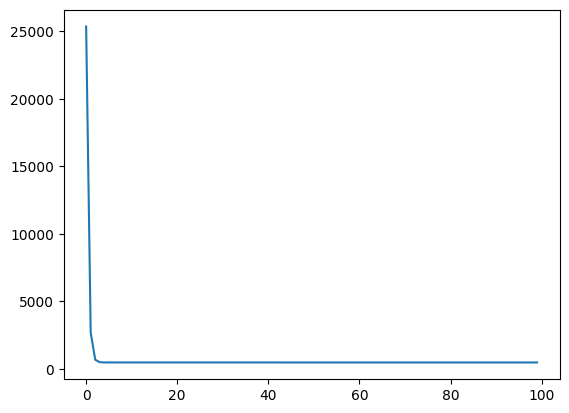

In [70]:
model = RegressionModel()

loss_list = []
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j], y_p)

    loss /= len(x)
    loss_list.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        model.update()
    model.reset_grad()

    if epochs%20==0:
        print('The parameters are w={}, b={} and loss={}'.format(model.w, model.b, loss.item()))

plt.plot(loss_list)
plt.show()